# BP神经网络原理研究
# 张昕杨
# 2018.2.5

# 用神经网络来学习XOR函数迭代版

# 有一个单细胞生物，生活在糖水和盐水混合物中，糖水盐水在不停的流动，它有两个鞭毛，分别可以感知糖水和盐水，当总浓度到达一定值时，就会吃这些糖水盐水


![](神经元.png)  ![](ANN.jpg)


# 但是，同时吃进糖水和盐水，会造成细胞结石，有损细胞健康


# 慢慢地，单细胞生物慢慢和其它细胞一起，组成了多细胞生物，进化出了一个能力，有糖水吃糖水，有盐水吃盐水，同时都有的话就不吃，防止细胞里面无法同时消化两种物体。

![](多神经元.png)
![](ANNNetwork.jpg)

# 这就这是我们要模拟的神经网络：

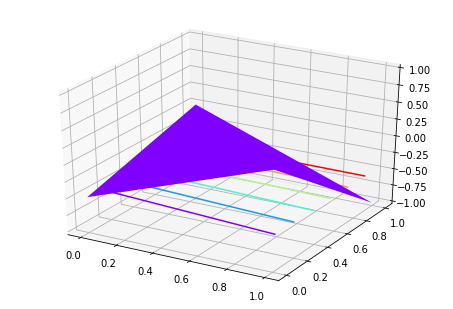

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x1=np.arange(0,2,1)
x2=np.arange(0,2,1)
A=np.array([0.2,100])
#tang yan
X,Y = np.meshgrid(x1, x2)    # x-y 平面的网格
R=X*A[0]+Y*A[1]
Z=1/(1+np.exp(-R))
ZXOR=np.logical_xor(X,Y)
ZERR=ZXOR-Z
#print(np.square(np.sum(ZERR))
#ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
#ax.plot_surface(X, Y, ZXOR, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
ax.plot_surface(X, Y, ZERR, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

# 绘制从3D曲面到底部的投影
ax.contour(X, Y, Z, offset = -0.5, cmap = 'rainbow')

# 设置z轴的维度
ax.set_zlim(-1, 1)

plt.show()


In [2]:
import numpy as np  # Note: there is a typo on this line in the video

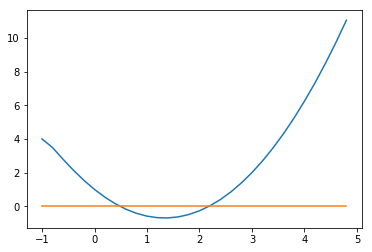

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-1,5,0.2)

y=x*x+np.sqrt(x+1)-3*x

y0=(x+x)*0

# print(x,y)

plt.plot(x,y)
plt.plot(x,y0)

plt.show()

# print("x,y,y1,yh")

x=0.5
# print(x)
yl=x*x+np.sqrt(x+1)-3*x
# print(yl)

x=2.1824
# print(x)
yh=x*x+np.sqrt(x+1)-3*x
# print(yh)




# 首先，定义一个sigmod函数

In [29]:
def nonlin(x, deriv=False):  
#     print(x)
#     print(deriv)
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))

# 1/(1+exp(-x)) 导数推导

(1/(1+exp(-x)))'=((1+exp(-x))^-1)'=(-1)((1+exp(-x))^-2)(1+exp(-x))'=(-1)((1+exp(-x))^-2)(exp(-x))'
而(exp(-x))'可以先转成(exp(x)^-1)'，于是她又是一个复合函数的求导，即(exp(x)^-1)对exp(x)的导数再乘上exp(x)对x的导数，又基本初等函数求导公式告诉我们，(exp(x))'=exp(x)，所以(exp(-x))'=(exp(x)^-1)'=(-1)(exp(x)^-2)(exp(x))'=(-1)(exp(x)^-2)exp(x)=(-1)(exp(x)^-1)=(-1)exp(-x)
那么：
(-1)((1+exp(-x))^-2)(exp(-x))'=(-1)((1+exp(-x))^-2)(-1)exp(-x)=exp(-x)((1+exp(-x))^-2)=exp(-x)/((1+exp(-x))^2) 

![](dsigmoid.png)


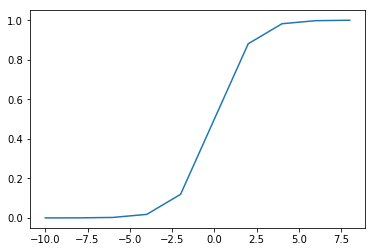

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,2)
y=nonlin(x)
# print(y)
plt.plot(x,y)
plt.show()


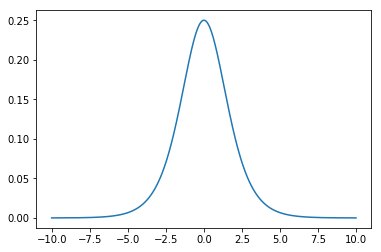

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,0.01)
y = 1/(1+np.exp(-x))
yderiv=nonlin(y,deriv=True)
plt.plot(x,yderiv)
plt.show()


# 复习一下表格试凑法

![](weights_solution.png)

![](BPBSYN0SYN1.png)

In [32]:
syn0 = np.array([[-10000000,-2000000,100000.1,1000000],
                 [-1000000,10000,-200000,20000],
                 [10000,-100,-1.2,-1000000.5]
                ])

# print(syn0)

syn1=np.array([[0],
              [1.0],
              [1.0],
              [0]])



# 所有可能的输入值放在一个向量中

In [33]:
#input data
xinputs = np.array([[0,0,1], 
            [0,1,1],
            [1,0,1],
            [1,1,1]])
l0=xinputs

# 计算第一层的线性输出


In [34]:
SO1=np.dot(xinputs,syn0)
# print(SO1)

In [35]:
l1=nonlin(SO1)
# print(l1)

c:\users\suiya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [36]:
SO2=np.dot(l1,syn1)
# print(SO2)

In [37]:
l2=nonlin(SO2)
# print(l2)

# 希望的的输出结果

In [38]:
#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

# 误差是

In [39]:
l2_error=y-l2
# print(l2_error)

# 为了直观地得出总误差多大，引入绝对值平均值lmabs

In [40]:
#误差的平均绝对为
lms=np.mean(np.abs(l2_error))
# print(lms)

sk=[]
yerrorlmss=[]
syn1_0=[]
sks=0

syn1_0.append(syn1[0,0])
sk.append(sks)
yerrorlmss.append(lms)
sks=sks+1


# 误差反向传播

![](syn01delta.png)

# 利用误差修正第二层权值网络

In [41]:
l2_delta = l2_error*nonlin(l2, deriv=True)

In [42]:
# print(l2_delta)

# 计算第一层的误差

In [43]:
# print(syn1)

In [44]:
# print(syn1.T)

In [45]:
l1_error = l2_delta.dot(syn1.T)
# print(l1_error)

# 计算第一层的修正值

In [46]:
l1_delta = l1_error * nonlin(l1,deriv=True)
# print(l1_delta)

# 修正权值网络

In [47]:
syn1 += l1.T.dot(l2_delta)
syn0 += l0.T.dot(l1_delta)    

In [48]:
# print(syn0)
# print(syn1)

![](syn01delta.png)

# 机器迭代最终答案

In [49]:
for j in range(100):  
    
#     print("start forward calulate")
    l0 = xinputs
#     print("l0")
#     print(l0)    
    l1 = nonlin(np.dot(l0, syn0))
#     print("l1")
#     print(l1)
    l2 = nonlin(np.dot(l1, syn1))
#     print("l2")
#     print(l2)
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    
#     print("l2")
#     print(l2)
    
#     print("l2_error")
#     print(l2_error)
    
    lms=np.mean(np.abs(l2_error))
    syn1_0.append(syn1[0,0])
    sk.append(sks)
    yerrorlmss.append(lms)
    sks=sks+1
#     print(sks)
    
#     print("Error:")
#     print(lms)
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
#     print("nonline derive")
#     print(nonlin(l2,deriv=True))
    
#     print("l2_delta")      
#     print(l2_delta)
          
    l1_error = l2_delta.dot(syn1.T)
    
#     print("syn1.T")
#     print(syn1.T)
    
#     print("l1_error")
#     print(l1_error)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
#     print("nonlin(l1,deriv=True)")
#     print(nonlin(l1,deriv=True))
        
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
#     print("syn0 syn1")
    
#     print(syn0)
#     print(syn1)
    
# print("Output after training")
# print(l2)

# print(syn1_0)
# print(yerrorlmss)
   

c:\users\suiya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


# 这是我们迭代的最终结果

# 画出迭代过程中syn1_0值的变化趋势

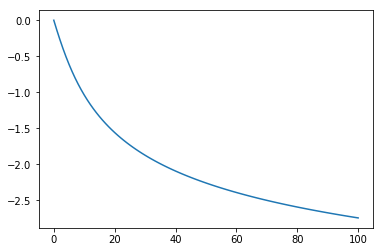

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = sk
y = syn1_0


plt.plot(x,y)
plt.show()


# 画出迭代过程中，yerrorlms变化趋势

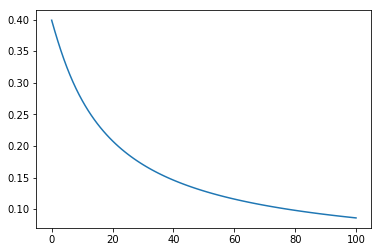

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = sk
y = yerrorlmss

plt.plot(x,y)
plt.show()


# 作业：修改迭代次数，根据yerrolms的趋势，确定迭代次数的最佳值